# Github Repository LINK

# https://github.com/Hamza-Jamil121/Dynamic-Pipeline-For-Machine-Learning

# Master Function
**In this Task, I create a master function that have a ability to work on classification problem using KNN Algorithm, In this master function, I created multiple function , we call all these function in our master function only one time and name of these functions are as below:**
- load_dataset
- clean_data
- transform_data
- select_features
- train_model
- evaluate_model
- plot_correlation_matrix
- plot_histograms
- plot_boxplots
- remove_outliers
- calculate_five_number_summary
- plot_confusion_matrix
- plot_roc_curve
- Master

# ALL FUCNTION DESCRIPTIONS

# load_dataset(file_path=None, id=None)
- The main purpose of the this function to read the csv file or Data ID that are given in UCI repository, we need to pass only
one argument in this function ID or File Path, this function help to read the file and also show the complete information dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings("ignore")



In [17]:
def load_dataset(file_path=None, id=None):
    if file_path:
        data = pd.read_csv(file_path)
        print(data.head())
        print('###################################################################\n')
        print('Data Information')
        print('Data Information',data.info())
        print('###################################################################\n')
    elif id:
        dataset = fetch_ucirepo(id=id)
        data = pd.concat([pd.DataFrame(dataset['data']['features']), pd.DataFrame(dataset['data']['targets'])], axis=1)
        data.columns = list(dataset['data']['features'].columns) + ['target']
        print(data.head())
        print('###################################################################\n')
        print('Data Information')
        print(data.info())
        print('###################################################################\n')
    else:
        print("Please provide either a file path or a dataset ID.")
        data = None
    return data

# calculate_five_number_summary(data)
- The calculate_five_number_summary function computes the five-number summary for each numerical column in the dataset. This summary includes the minimum value, first quartile (Q1), median (second quartile or Q2), third quartile (Q3), and maximum value. It provides a concise overview of the distribution and central tendency of the data, facilitating quick insights into its characteristics.

In [3]:
def calculate_five_number_summary(data):
    summary = data.describe()
    return summary

# plot_histograms(data)
- The purpose of the plot_histograms function is to visualize the distribution of numerical features in a dataset using histograms. It takes a pandas DataFrame data as input and creates a separate histogram for each numerical feature. The histograms are plotted with a specified figure size (figsize) and number of bins (bins). Additionally, the histograms are colored cyan for better visibility. Finally, a common title "Histograms of Features" is added to the entire plot to provide context. This function helps in understanding the data distribution and identifying any patterns or outliers present in the numerical features.

In [4]:
def plot_histograms(data):
    data.hist(figsize=(10, 8), bins=20, color='cyan')
    plt.suptitle("Histograms of Features")
    plt.show()

# plot_boxplots(data)
- The purpose of this function to create a boxplot for all numerical columns and help to show the outlier of dataset and help
to read the five number of summary of complete dataset

In [5]:
def plot_boxplots(data):
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=numeric_data, palette='pastel')
    plt.ylim(numeric_data.min().min(), numeric_data.max().max())
    plt.title("Box Plot of Features (With Outliers)")
    plt.xticks(rotation=90)
    plt.show()

def plot_boxplots_with_good_colors(data):
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=numeric_data, palette='pastel')
    plt.ylim(numeric_data.min().min(), numeric_data.max().max())
    plt.title("Box Plot of Features (Outliers Removed)")
    plt.xticks(rotation=90)
    plt.show()

# plot_correlation_matrix(data)
- The main purpose of this function to create a corelation matrix for given data

In [6]:
def plot_correlation_matrix(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
    plt.title("Correlation Matrix")
    plt.show()

# clean_data(data)
- The main purpose of this function to pefrom data cleaning, this fuction take only one argument data and in this funtion first
we check the missing values if we found any missing values to handle this we use mean imputation to fill the missing values

In [7]:
def clean_data(data):
    print("Missing values before imputation:")
    print(data.isnull().sum())
    cleaned_data = data.fillna(data.mean())
    print("\nMissing values after imputation:")
    print(cleaned_data.isnull().sum())
    return cleaned_data

# remove_outliers(data)
- The remove_outliers function identifies and removes outliers from the dataset using the Interquartile Range (IQR) method. It calculates the first quartile (Q1), third quartile (Q3), and IQR for each numerical column. Then, it filters out rows where any value falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, effectively removing outliers. Finally, it returns the cleaned dataset without outliers.

In [42]:

# def remove_outliers(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     cleaned_data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
#     print(cleaned_data.head())
    
    
#     print('outlier remove use IQR method')
#     return cleaned_data

def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    cleaned_data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    print('Outlier removed using IQR method')
    print(cleaned_data.head())
#     print(clean_data.shape())
    # Print first five rows
    return cleaned_data


# transform_data(data)
- The main purpose of this fucntion to perfrom data transformationone-hot encoding for categorical columns, and also conver the 
targeted column values into form of 0 and 1 etc and also perfrom data scaling with the help of standard scaling

In [9]:
def transform_data(data):
    encoded_data = pd.get_dummies(data.drop(columns=['target']))
    print('create dummy variables for categorical columns')
    print('###################################################################\n')
    print(encoded_data.info())
    print('###################################################################\n')
    label_encoder = LabelEncoder()
    target_encoded = label_encoder.fit_transform(data['target'])
    target_names = list(label_encoder.classes_)  # Preserve original class names
    print('###################################################################\n')
    print('targeted values',target_names)
    print('covert targeted column class in the form of 0 and 1 etc if multiclass convert it 0,1,2.......etc')
    print('###################################################################\n')
    scaler = StandardScaler()
    transformed_data = scaler.fit_transform(encoded_data)
    print('###################################################################\n')
    print('Five Row after data scaling')
    scaled_df = pd.DataFrame(transformed_data).head()
    print(scaled_df)
    print('###################################################################\n')
    print('Standard data scaling')
    return transformed_data, target_encoded, target_names

# select_features(data, y, k)

- The select_features function is designed to perform feature selection on a dataset to identify the most relevant features for predicting the target variable. It utilizes the SelectKBest method from scikit-learn's feature_selection module to select the top k features based on their scores obtained from a specified scoring function.
Parameters:
data: DataFrame
The input dataset containing features and the target variable.
y: array-like
The target variable (dependent variable) to be predicted.
k: int
The number of features to select.

In [10]:
def select_features(data, y, k):
    X = data.drop(columns=['target'])
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    best_features = list(X.columns[selector.get_support()])
    return X_selected, best_features

## train_model(X_train, y_train)
- The train_model function trains a k-nearest neighbors (KNN) classifier using the training data (X_train, y_train). It initializes a KNeighborsClassifier object, fits it to the training data using the fit method, and returns the trained classifier. KNN is a simple and effective classification algorithm that assigns labels to data points based on the majority class among their k nearest neighbors in the feature space.






In [11]:
def train_model(X_train, y_train):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    print('###################################################################\n')
    print(knn)
    print('KNN MODEL CREATION DONE')
    return knn

## evaluate_model(model, X_test, y_test, target_names=None)
- The evaluate_model function assesses the trained model's performance using classification metrics. It generates a classification report, including precision, recall, F1-score, and support for each class, based on the predictions made on the test data

In [29]:
def evaluate_model(model, X_test, y_test, target_names=None):
    if target_names is None:
        target_names = np.unique(y_test).astype(str)
    else:
        target_names = [str(name) for name in target_names]
    y_pred = model.predict(X_test)
    print('###################################################################\n')
    
    report = classification_report(y_test, y_pred, zero_division=1, target_names=target_names)
#     print(report)
    
    return report

## plot_confusion_matrix(model, X_test, y_test, target_names)
- The plot_confusion_matrix function generates a visual representation of the confusion matrix for evaluating classification model performance. It uses a heatmap to display the true and predicted labels, with annotations indicating the count in each cell. Axes are labeled with target class names, and the plot includes a title for clarity.

In [45]:
# def plot_confusion_matrix(model, X_test, y_test, target_names):
#     y_pred = model.predict(X_test)
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g')
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
#     plt.xticks(ticks=np.arange(len(target_names)), labels=target_names, rotation=45)
#     plt.yticks(ticks=np.arange(len(target_names)), labels=target_names, rotation=45)
#     plt.title('Confusion Matrix')
#     plt.show()
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


##  plot_roc_curve(model, X_test, y_test)
- The plot_roc_curve function generates a Receiver Operating Characteristic (ROC) curve to evaluate the binary classification model's performance. It plots the true positive rate against the false positive rate, with the area under the curve (AUC) as a metric for model quality. If the classification has more than two classes, it prints a message indicating that ROC curve plotting is not supported.

In [14]:
def plot_roc_curve(model, X_test, y_test):
    n_classes = len(np.unique(y_test))
    if n_classes == 2:
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve (Binary Classification)')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print("ROC curve plotting is not supported for multi-class classification.")


In [46]:

def Master(file_path=None, id=None):
    print('###########################################################\n')
    print('Data Reading')
    data = load_dataset(file_path=file_path, id=id)
    
    print('###########################################################\n')
    print('Five Number of Summary')
    summary = calculate_five_number_summary(data)
    print("\nFive-Number Summary ::\n", summary)
    
    print('###########################################################\n')
    
    print('Exploratory Data Anaysis using historgram')
    plot_histograms(data)
    print('###########################################################\n') 
    print('Exploratory Data Anaysis using boxplot')
    plot_boxplots(data)
    print('###########################################################\n')
    
    print('Exploratory Data Anaysis using Corelation Matrix')
    plot_correlation_matrix(data)
    print('###########################################################\n')
    print('Data Cleaning part')
    cleaned_data = clean_data(data)
    print('###########################################################\n')
    print('Outlier removing rule')
    cleaned_data_no_outliers = remove_outliers(cleaned_data)
    
    print('boxplot after removing outlier')
    plot_boxplots_with_good_colors(cleaned_data_no_outliers)
    print('###########################################################\n')
    
    print('data spliting into train and test dataset')
    X, y, target_names = transform_data(cleaned_data_no_outliers)
    print(len(X))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = train_model(X_train, y_train)
    print('###########################################################\n')
    print('classification Report')
    evaluation_report = evaluate_model(model, X_test, y_test, target_names=target_names)
    
    print('###########################################################\n')
    print('train dataset and test dataset accurancy on KNN')
    training_accuracy = model.score(X_train, y_train)
    testing_accuracy = model.score(X_test, y_test)
    print('###########################################################\n')
    print("Training Model Accuracy: {:.2f}%".format(training_accuracy * 100))
    print("Testing Model Accuracy: {:.2f}%".format(testing_accuracy * 100))
    print('###########################################################\n')
    
    plot_confusion_matrix(model, X_test, y_test)
    print('###########################################################\n')
    print('Roc Curve Plot')
    plot_roc_curve(model, X_test, y_test)
    print('###########################################################\n')
    return evaluation_report


# Dataset one

# https://archive.ics.uci.edu/dataset/27/credit+approval

- Dataset Name : Credit Approval
- Business Domain : Finance
- Size of Dataset:  690 rows + 16 columns (continous and categorical)

# Insights after Performing Data Science Life Cycle on credit approval Dataset

- HISTORGRAM PLOT

In Historgram plot we can see that, This distribution suggests that the majority of your data is concentrated in one range or or multiple range: 
A15 Histogram:
Sharp peak on the left side, indicating high frequency of low values.
X-axis ranges from 0 to 100,000.
Y-axis ranges from 0 to 600.

A14 Histogram:
Data distributed between 0 and about 2,000 on the x-axis.
Y-axis ranges from 0 to about 200.

A8 Histogram:
Cyan-colored bars with a sharp peak on the left side (similar to A15 but smaller scale).
X-axis ranges from 0 to about 25.
Y-axis ranges up to approximately 400.

A3 Histogram:
Cyan-colored bars showing another sharp initial peak that declines rapidly.
X-axis ranging from around 0 to 25.
Y-axis peaking at just over 200.

A2 Histogram:
Features cyan-colored bars with varied heights.
Data spread across an x-range of approximately up to 80.
Peaks prominently near zero and has multiple smaller peaks.

-  correlation matrix

Each cell in the matrix shows the correlation coefficient between two variables.
The color gradient ranges from yellow (strong positive correlation) to green (no correlation) and purple (negative correlation).
Key Observations:
Variables A15, A14, and A11 exhibit weak correlations with each other (close to green).
A8 has a moderate positive correlation with AB (greenish-yellow).
A3 shows a moderate positive correlation with AA2 (greenish-yellow).

- BOX PLOT 

 In boxplot we can see that there are lot of outlier in our dataset in columns A15 we can the large amount of outlier

 For removing oultier i use IQR method and after remove we can see new boxplot does  contain few amount of oultiers.

- Confusion Matrix Plot

We have 56 true positives (correctly predicted positive instances) and 16 true negatives (correctly predicted negative instances).
However, there are 18 false positives (instances where the model predicted positive but the actual label was negative) and 5 false negatives (instances where the model predicted negative but the actual label was positive).

- ROC Curve Plot

The ROC Curve is a graphical representation that summarizes the performance of a binary classification model.
It shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR).
In your case, the AUC (Area Under Curve) is approximately 0.83, indicating good performance in distinguishing between positive and negative classes.
Remember, a higher AUC value suggests better model performance!

- Classification Report

For the positive class, the model has a precision of 0.76, meaning that when it predicts positive, it’s correct 76% of the time.
The recall for the positive class is 0.47, indicating that the model identifies only 47% of actual positive cases.
In summary, the model shows decent precision but struggles with recall for positive instances.





###########################################################

Data Reading
   A15    A14 A13 A12  A11 A10 A9    A8 A7 A6 A5 A4     A3     A2 A1 target
0    0  202.0   g   f    1   t  t  1.25  v  w  g  u  0.000  30.83  b      +
1  560   43.0   g   f    6   t  t  3.04  h  q  g  u  4.460  58.67  a      +
2  824  280.0   g   f    0   f  t  1.50  h  q  g  u  0.500  24.50  a      +
3    3  100.0   g   t    5   t  t  3.75  v  w  g  u  1.540  27.83  b      +
4    0  120.0   s   f    0   f  t  1.71  v  w  g  u  5.625  20.17  b      +
###################################################################

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     690 non

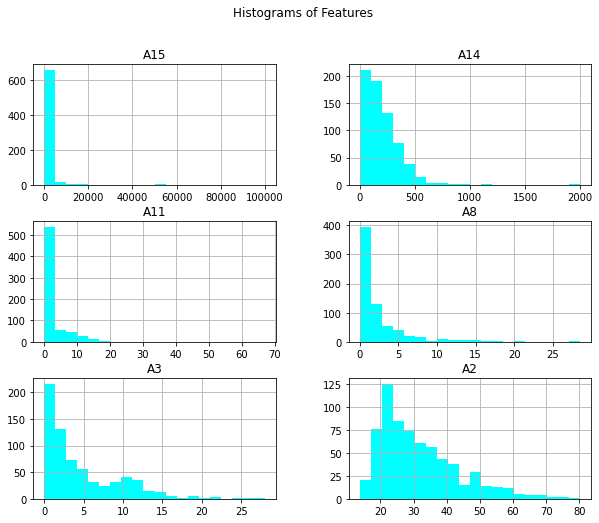

###########################################################

Exploratory Data Anaysis using boxplot


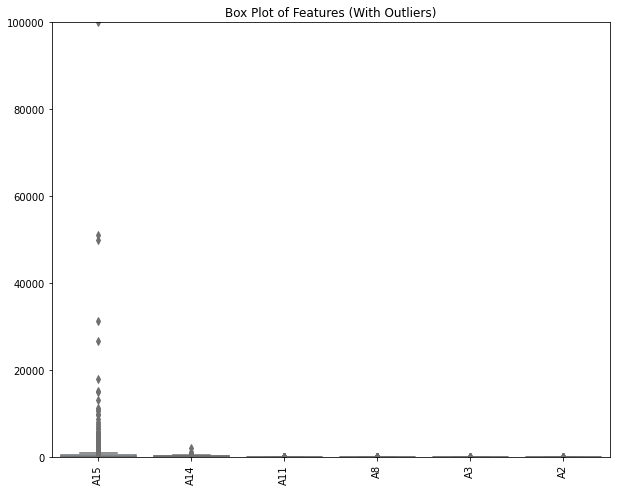

###########################################################

Exploratory Data Anaysis using Corelation Matrix


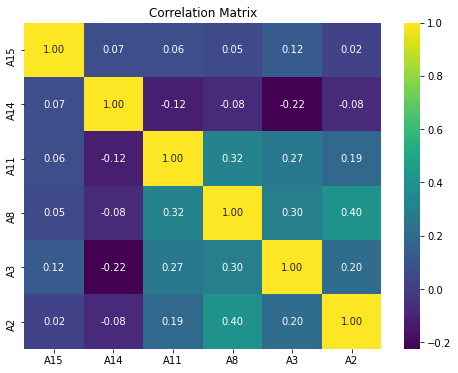

###########################################################

Data Cleaning part
Missing values before imputation:
A15        0
A14       13
A13        0
A12        0
A11        0
A10        0
A9         0
A8         0
A7         9
A6         9
A5         6
A4         6
A3         0
A2        12
A1        12
target     0
dtype: int64

Missing values after imputation:
A15        0
A14        0
A13        0
A12        0
A11        0
A10        0
A9         0
A8         0
A7         9
A6         9
A5         6
A4         6
A3         0
A2         0
A1        12
target     0
dtype: int64
###########################################################

Outlier removing rule
Outlier removed using IQR method
   A15    A14 A13 A12  A11 A10 A9    A8 A7 A6 A5 A4     A3     A2 A1 target
0    0  202.0   g   f    1   t  t  1.25  v  w  g  u  0.000  30.83  b      +
1  560   43.0   g   f    6   t  t  3.04  h  q  g  u  4.460  58.67  a      +
2  824  280.0   g   f    0   f  t  1.50  h  q  g  u  0.500  24.50 

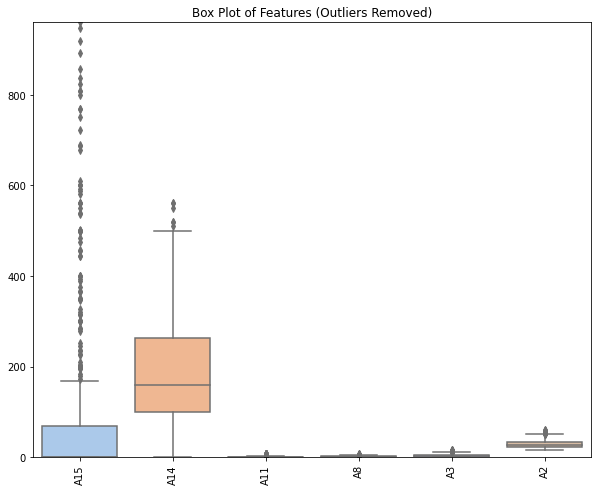

###########################################################

data spliting into train and test dataset
create dummy variables for categorical columns
###################################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 688
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     473 non-null    int64  
 1   A14     473 non-null    float64
 2   A11     473 non-null    int64  
 3   A8      473 non-null    float64
 4   A3      473 non-null    float64
 5   A2      473 non-null    float64
 6   A13_g   473 non-null    uint8  
 7   A13_p   473 non-null    uint8  
 8   A13_s   473 non-null    uint8  
 9   A12_f   473 non-null    uint8  
 10  A12_t   473 non-null    uint8  
 11  A10_f   473 non-null    uint8  
 12  A10_t   473 non-null    uint8  
 13  A9_f    473 non-null    uint8  
 14  A9_t    473 non-null    uint8  
 15  A7_bb   473 non-null    uint8  
 16  A7_dd

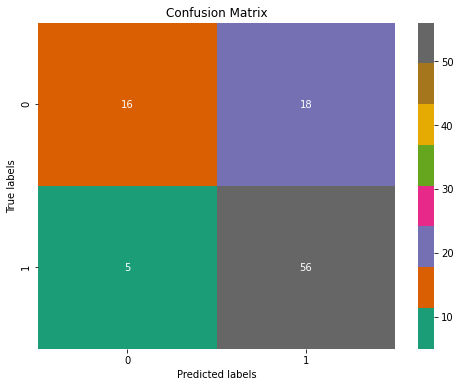

###########################################################

Roc Curve Plot


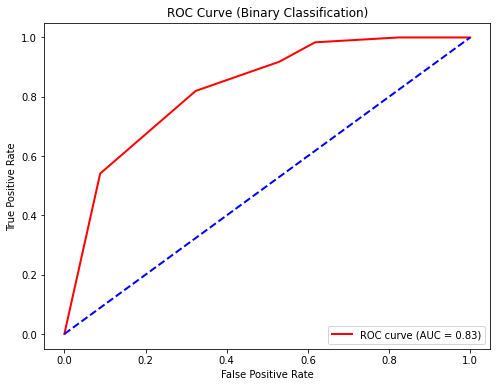

###########################################################

              precision    recall  f1-score   support

           +       0.76      0.47      0.58        34
           -       0.76      0.92      0.83        61

    accuracy                           0.76        95
   macro avg       0.76      0.69      0.71        95
weighted avg       0.76      0.76      0.74        95



In [47]:
file_path = None  
id_number = 27
print(Master(file_path=file_path, id=id_number))

# Dataset Two

# https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

- Dataset Name :  Dry Bean Dataset
- Business Domain : Biology
- Size of Dataset:  1360 rows + 17 columns (Multi classification problem)

# Insights after Performing Data Science Life Cycle on Dry Bean Dataset

- Historgram Plot

Area, Perimeter,Convex Area,Extent and other geometric parameters or columns exhibit skewed distributions, suggesting variability in size .This diversity may indicate distinct subgroups within the population.
The histograms provide insights into the characteristics of the objects, highlighting their non-normal distributions.

- Corelation Matrix

Area and Perimeter exhibit a strong positive correlation (0.971), meaning as one increases, the other tends to increase.
Compactness and ShapeFactor1 have a negative correlation (-0.86), suggesting that when one grows, the other decreases.
Yellow cells indicate little to no correlation between certain parameters. 

- Box Plot

 In boxplot we can see that there are lot of outlier in our dataset in columns Area,convexArea we can see the large amount of outlier boxplot also represent the IQR for each column individually,
 For removing oultier i use IQR method and after remove we can see new boxplot does  contain few amount of oultiers.
 
- Confusion Matrix

The matrix helps evaluate a classification model’s performance.
The diagonal cells represent correct predictions, while off-diagonal cells show misclassifications.
For instance, label 2 has the highest correct predictions (622), but label 5 was incorrectly predicted as label 1 61 times.

- Classification Report

The model’s overall accuracy is 91%, which is quite good.
For each class:
BARBUYA has high precision and recall (0.94 and 0.92), indicating reliable identification.
DERMASON shows good performance with an F1-score of 0.91.
SIRA has lower scores, suggesting room for improvement.



###########################################################

Data Reading
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2

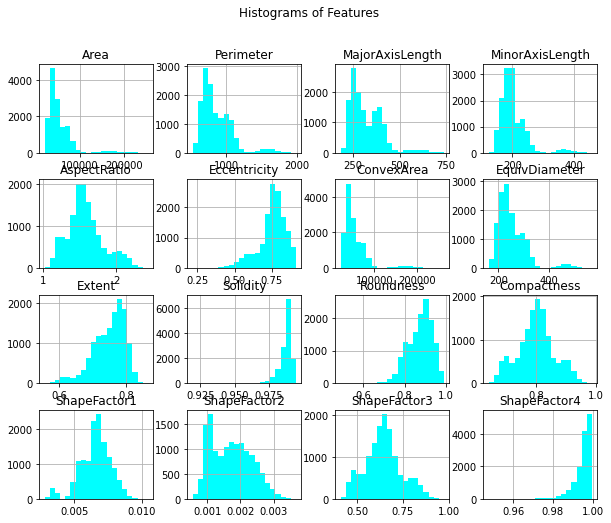

###########################################################

Exploratory Data Anaysis using boxplot


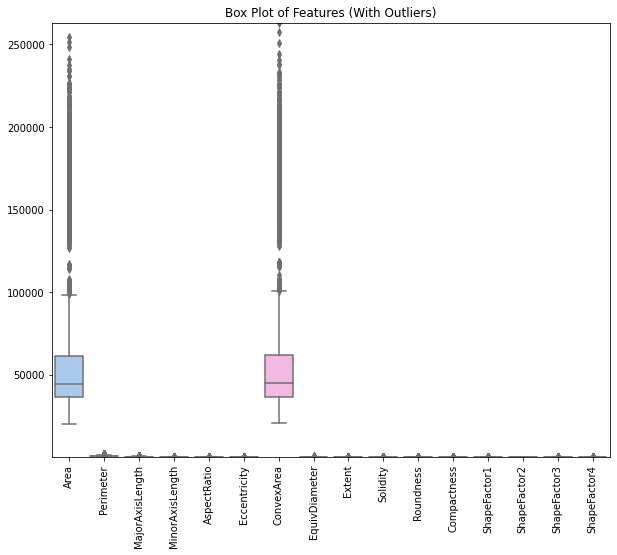

###########################################################

Exploratory Data Anaysis using Corelation Matrix


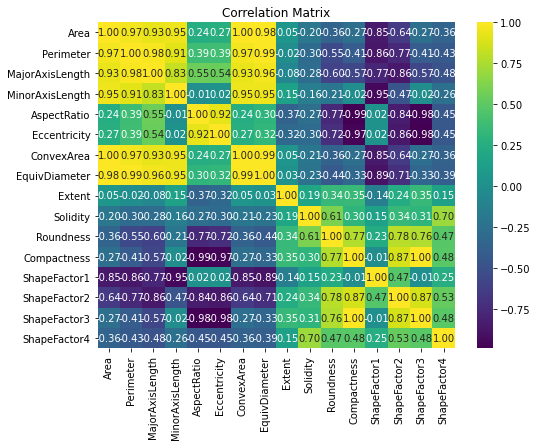

###########################################################

Data Cleaning part
Missing values before imputation:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
target             0
dtype: int64

Missing values after imputation:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
target             0
dtype: int64
###########################################################

Outlier removing rule
Outlier removed using IQR met

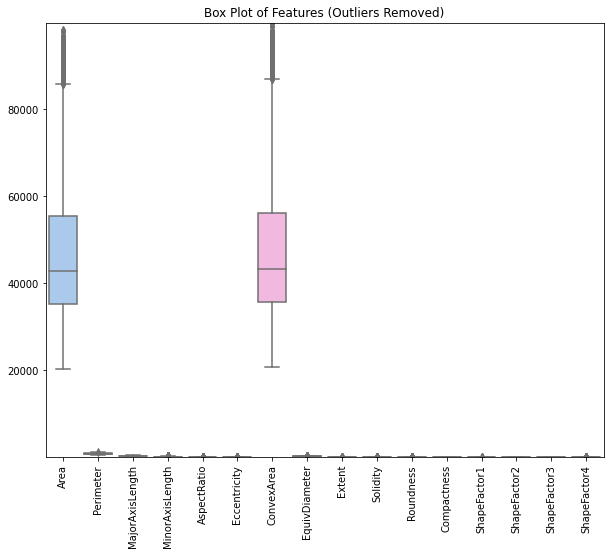

###########################################################

data spliting into train and test dataset
create dummy variables for categorical columns
###################################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10594 entries, 23 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10594 non-null  int64  
 1   Perimeter        10594 non-null  float64
 2   MajorAxisLength  10594 non-null  float64
 3   MinorAxisLength  10594 non-null  float64
 4   AspectRatio      10594 non-null  float64
 5   Eccentricity     10594 non-null  float64
 6   ConvexArea       10594 non-null  int64  
 7   EquivDiameter    10594 non-null  float64
 8   Extent           10594 non-null  float64
 9   Solidity         10594 non-null  float64
 10  Roundness        10594 non-null  float64
 11  Compactness      10594 non-null  float64
 12  ShapeFactor1     10594

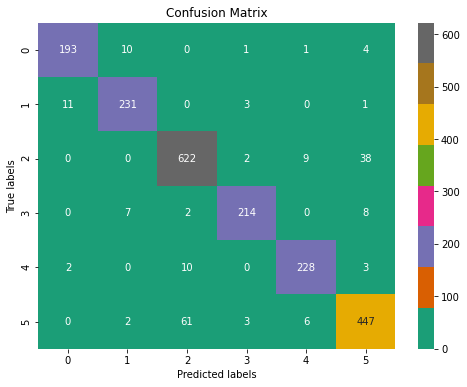

###########################################################

Roc Curve Plot
ROC curve plotting is not supported for multi-class classification.
###########################################################

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       209
        CALI       0.92      0.94      0.93       246
    DERMASON       0.89      0.93      0.91       671
       HOROZ       0.96      0.93      0.94       231
       SEKER       0.93      0.94      0.94       243
        SIRA       0.89      0.86      0.88       519

    accuracy                           0.91      2119
   macro avg       0.92      0.92      0.92      2119
weighted avg       0.91      0.91      0.91      2119



In [52]:
file_path = None  
id_number = 602
print(Master(file_path=file_path, id=id_number))

# Dataset Three

# https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

- Dataset Name :  Rice (Cammeo and Osmancik)
- Business Domain : Biology
- Size of Dataset:  3810 rows +  8 columns 

# Insights after Performing Data Science Life Cycle on Rice (Cammeo and Osmancik)

- Histogram

Area and Perimeter exhibit normal distributions, suggesting a common size and shape among the analyzed objects (likely cells or particles).
Major Axis Length centers around 175 to 200 units, indicating a typical length range.
Minor Axis Length follows another normal distribution, centered at approximately 80 units.
Eccentricity is skewed towards higher values, implying that many objects are elongated.
Convex Area mirrors the pattern of Area, peaking just above 10,000 units.
Extent displays a bimodal distribution, suggesting two distinct groups based on the ratio of object area to its bounding box.

- Box Plot

In boxplot we can see that there are lot of outlier in our dataset in columns Area,convexArea we can see the large amount of outlier boxplot also represent the IQR for each column individually,
 For removing oultier i use IQR method and after remove we can see new boxplot does not contain oultiers.
    
- Corelation Matrix

The matrix reveals how different variables relate to each other.
Area and Perimeter have a strong positive correlation (0.97), meaning as one increases, the other tends to increase.
Extent, however, shows negative correlations with most variables, suggesting an inverse relationship.

- Confusion Matrix

True Positives (TP): These are instances where the model correctly predicted the positive class (label 1). In our case, there are 301 true positives.
False Positives (FP): These occur when the model predicted the positive class incorrectly. We have 41 false positives, meaning the model mistakenly labeled some negative examples as positive.
False Negatives (FN): These represent instances where the model predicted the negative class (label 0) incorrectly. We have 31 false negatives, indicating that some positive examples were misclassified as negative.
True Negatives (TN): These are correct predictions of the negative class. We have 372 true negatives, where the model accurately labeled negative examples.


- Classification Report

Cammeo Class:
Precision: The model correctly identifies 91% of Cammeo instances out of all predicted Cammeo samples.
Recall: It captures 88% of the actual Cammeo instances within the dataset.
F1-score: The harmonic mean of precision and recall is 89% for Cammeo.

Osmanick Class:
Precision: The model accurately predicts 90% of Osmanick samples out of all predicted Osmanick instances.
Recall: It successfully captures 92% of the true Osmanick instances.
F1-score: The F1-score for Osmanick is 91%.

 

###########################################################

Data Reading
    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  target  
0        15617  0.572896  Cammeo  
1        15072  0.615436  Cammeo  
2        14954  0.693259  Cammeo  
3        13368  0.640669  Cammeo  
4        15262  0.646024  Cammeo  
###################################################################

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------        

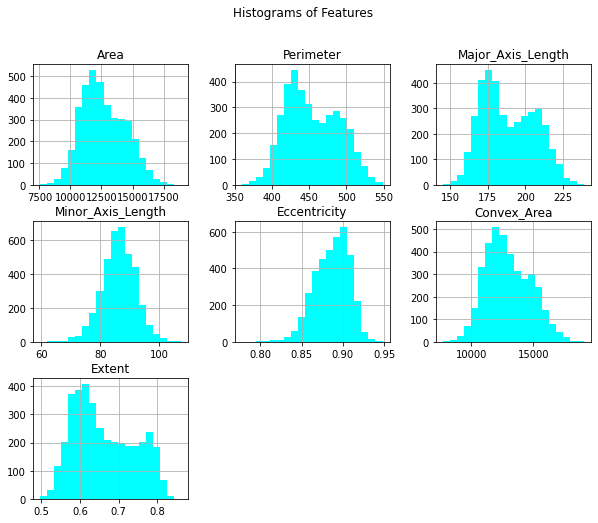

###########################################################

Exploratory Data Anaysis using boxplot


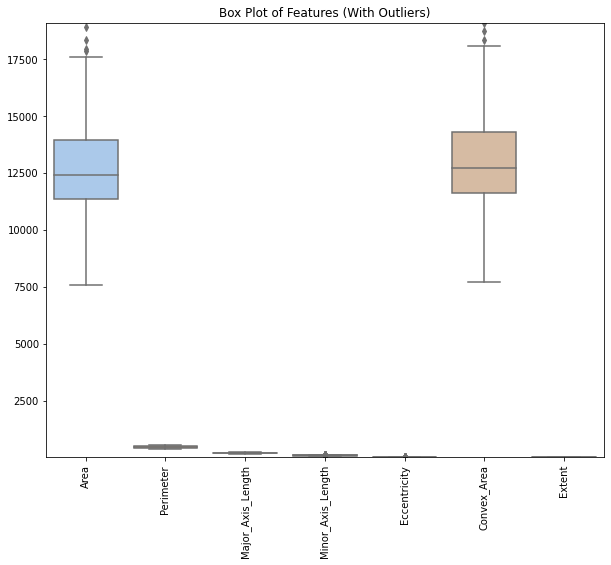

###########################################################

Exploratory Data Anaysis using Corelation Matrix


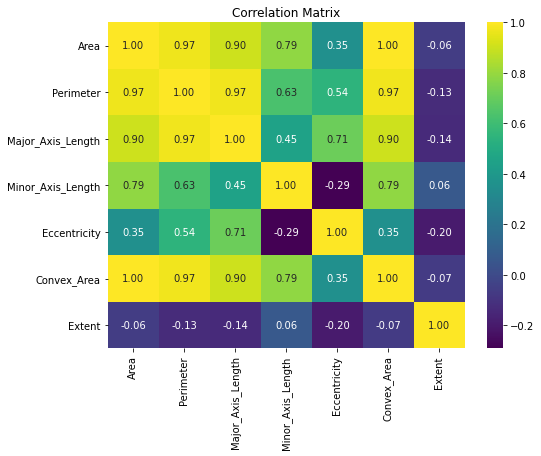

###########################################################

Data Cleaning part
Missing values before imputation:
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
target               0
dtype: int64

Missing values after imputation:
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
target               0
dtype: int64
###########################################################

Outlier removing rule
Outlier removed using IQR method
    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.33738

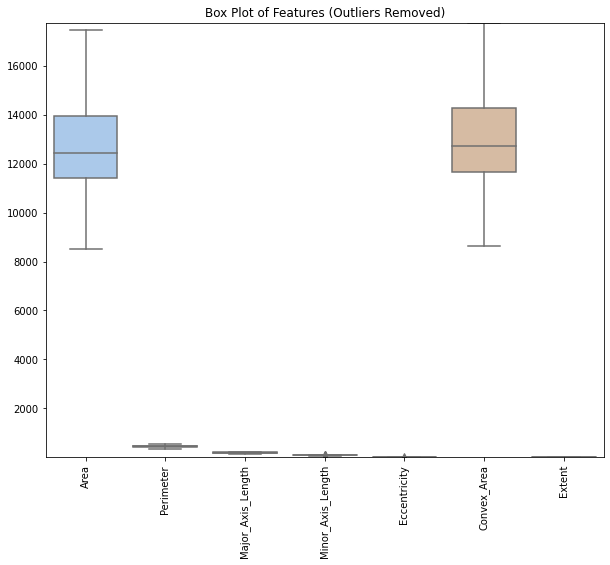

###########################################################

data spliting into train and test dataset
create dummy variables for categorical columns
###################################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 3808
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3725 non-null   int64  
 1   Perimeter          3725 non-null   float64
 2   Major_Axis_Length  3725 non-null   float64
 3   Minor_Axis_Length  3725 non-null   float64
 4   Eccentricity       3725 non-null   float64
 5   Convex_Area        3725 non-null   int64  
 6   Extent             3725 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 232.8 KB
None
###################################################################

###################################################################

targeted values ['Cammeo', 'Osmancik']
covert ta

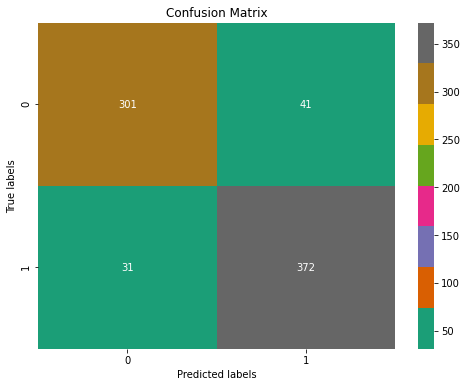

###########################################################

Roc Curve Plot


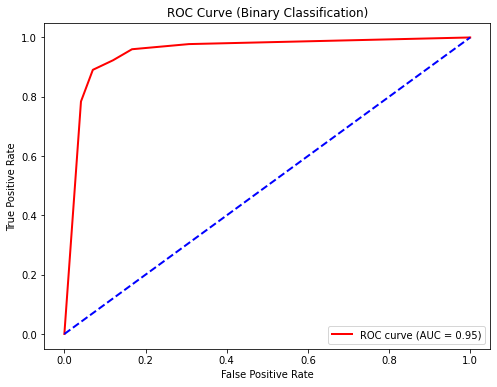

###########################################################

              precision    recall  f1-score   support

      Cammeo       0.91      0.88      0.89       342
    Osmancik       0.90      0.92      0.91       403

    accuracy                           0.90       745
   macro avg       0.90      0.90      0.90       745
weighted avg       0.90      0.90      0.90       745



In [58]:

id_number = 545
print(Master(file_path=file_path, id=id_number))

# Dataset Four

# https://archive.ics.uci.edu/dataset/222/bank+marketing

- Dataset Name :  Bank Marketing
- Business Domain : Business or marketing
- Size of Dataset:  45211 rows +  17 columns 

# Insights after Performing Data Science Life Cycle on Bank Marketing dataset

- Historgram Plot


    Age Histogram:-
        Most individuals fall between ages 20 to 60.
    Balance Histogram:-
        Majority have balances under 25000.
    Day_of_Week Histogram:-
        Data is fairly evenly distributed across all days.
    Duration Histogram:-
        Most clients have short durations (clustered near zero).
    Campaign Histogram:-
        Clients were contacted less than ten times during this campaign.
    Pdays Histogram:-
        Majority were recently contacted (clustered near zero).
    Previous Histogram:-
        Almost all data points are clustered at zero, indicating no or very few contacts before this campaign.

    
- Corelation Plot

The heatmap illustrates the relationships between various variables, including age, balance, day_of_week, duration, campaign, pdays, and previous.
Most pairs of variables exhibit weak or no significant correlation, as indicated by values close to zero.
Notably, ‘pdays’ and ‘previous’ demonstrate a moderate positive correlation (0.45).

- Box Plot

In boxplot we can see that there are lot of outlier in our dataset in column balance, we can see the large amount of outlier boxplot also represent the IQR for each column individually, For removing oultier i use IQR method and after remove we can see new boxplot balance column does  contain few oultiers.

- Confusion Matrix

Confusion plot, we see 51 true positives, 5281 true negatives, 50 false positives, and 257 false negatives. 

- Classificatio Report

“No” Class:-
Precision: 95%
This means that when the model predicts “no,” it is correct 95% of the time.
Recall:- 99%
The model can correctly identify 99% of the actual “no” instances.
F1-score:- 97%
A balanced measure combining precision and recall.
Support: 5,331 instances.
“Yes” Class:-
Precision:- 50%
The model’s accuracy in predicting “yes” instances is 50%.
Recall:- 17%
Only 17% of actual “yes” instances are correctly identified.
F1-score:- 25%
A low score due to the trade-off between precision and recall.
Support: 308 instances.

Overall Accuracy:- 95%
The model performs well overall.
However, improving “yes” class predictions is crucial.


###########################################################

Data Reading
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
0     NaN            5   may       261         1     -1         0      NaN   
1     NaN            5   may       151         1     -1         0      NaN   
2     NaN            5   may        76         1     -1         0      NaN   
3     NaN            5   may        92         1     -1         0      NaN   
4     NaN            5   may       198         1     -1         0      NaN   

  target  
0

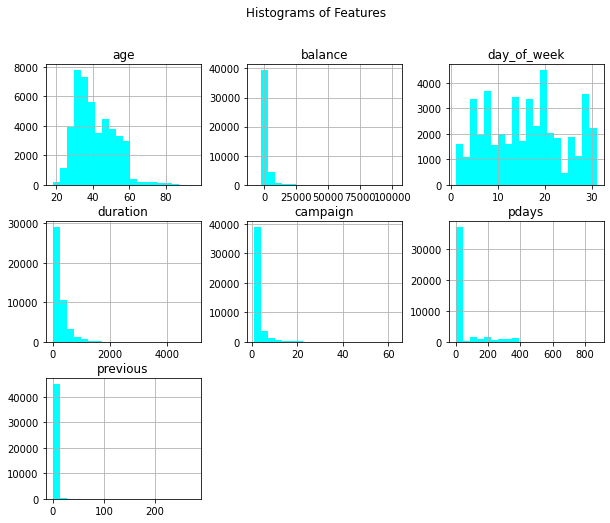

###########################################################

Exploratory Data Anaysis using boxplot


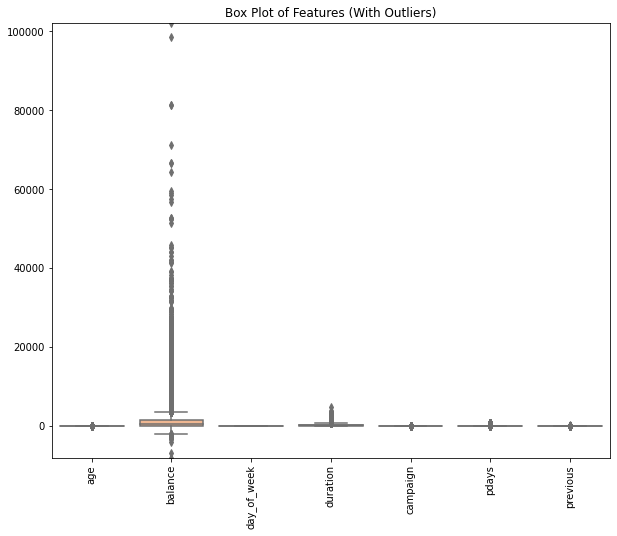

###########################################################

Exploratory Data Anaysis using Corelation Matrix


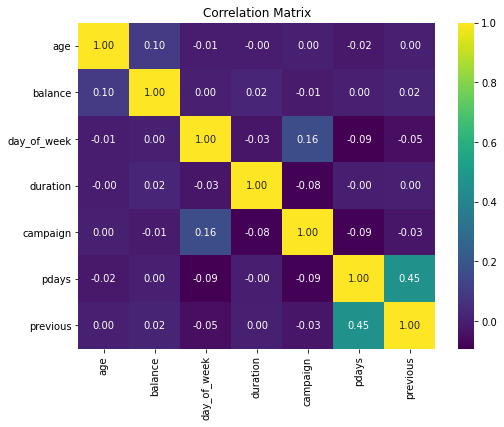

###########################################################

Data Cleaning part
Missing values before imputation:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
target             0
dtype: int64

Missing values after imputation:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
target             0
dtype: int64
###########################################################

Outlier removing rule
Outlier removed using IQR met

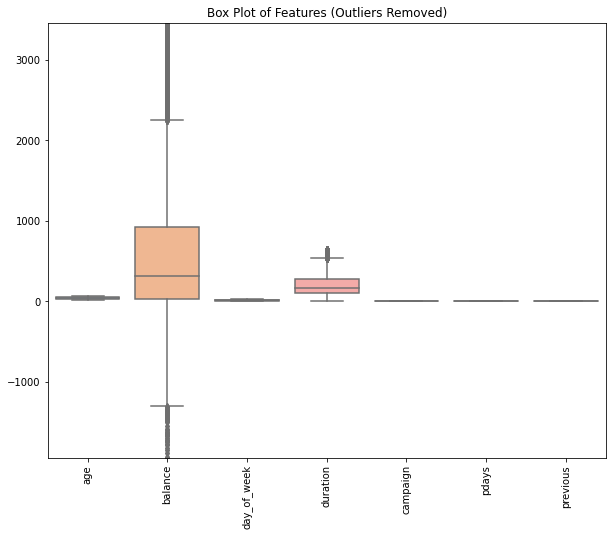

###########################################################

data spliting into train and test dataset
create dummy variables for categorical columns
###################################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28193 entries, 0 to 45209
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  28193 non-null  int64
 1   balance              28193 non-null  int64
 2   day_of_week          28193 non-null  int64
 3   duration             28193 non-null  int64
 4   campaign             28193 non-null  int64
 5   pdays                28193 non-null  int64
 6   previous             28193 non-null  int64
 7   job_admin.           28193 non-null  uint8
 8   job_blue-collar      28193 non-null  uint8
 9   job_entrepreneur     28193 non-null  uint8
 10  job_housemaid        28193 non-null  uint8
 11  job_management       28193 non-null  uint8


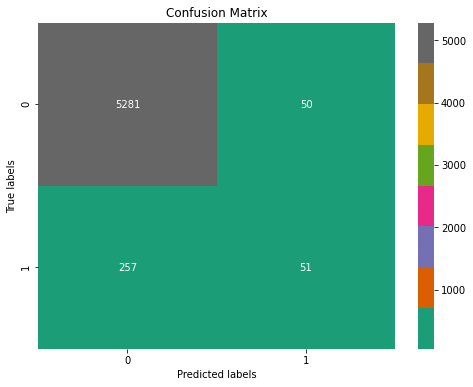

###########################################################

Roc Curve Plot


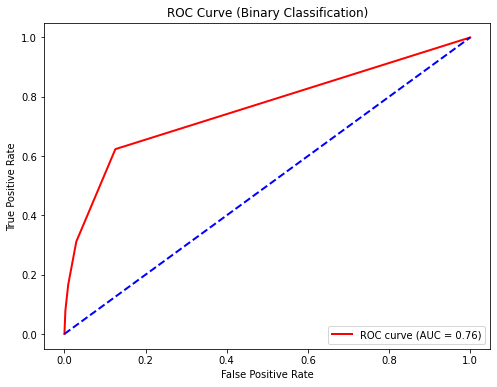

###########################################################

              precision    recall  f1-score   support

          no       0.95      0.99      0.97      5331
         yes       0.50      0.17      0.25       308

    accuracy                           0.95      5639
   macro avg       0.73      0.58      0.61      5639
weighted avg       0.93      0.95      0.93      5639



In [55]:
file_path = None  
id_number = 222
print(Master(file_path=file_path, id=id_number))

# Dataset Five

# https://archive.ics.uci.edu/dataset/53/iris

- Dataset Name :  IRIS
- Business Domain : Biology
- Size of Dataset:  149 rows +  5 columns 

###########################################################

Data Reading
   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
###################################################################

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), o

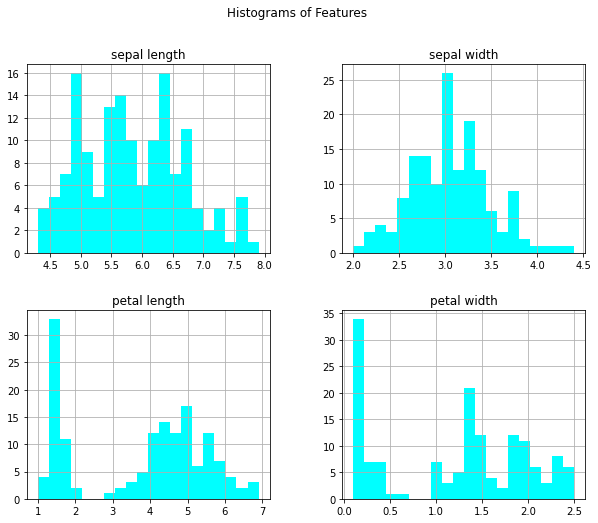

###########################################################

Exploratory Data Anaysis using boxplot


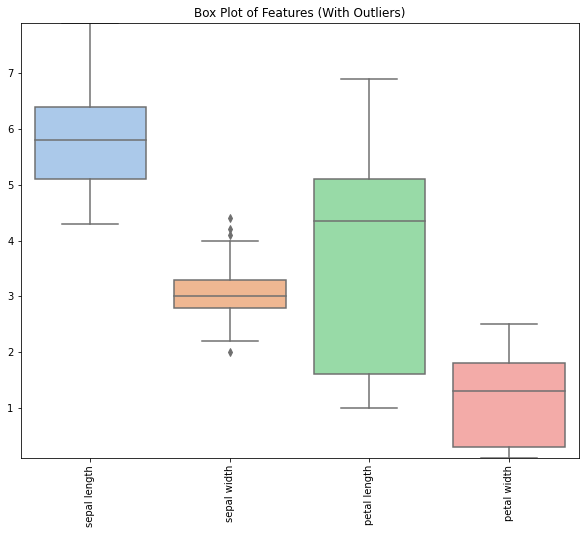

###########################################################

Exploratory Data Anaysis using Corelation Matrix


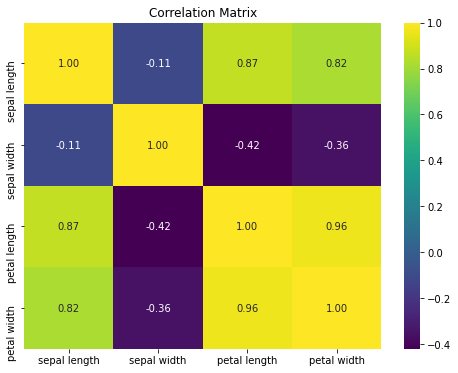

###########################################################

Data Cleaning part
Missing values before imputation:
sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

Missing values after imputation:
sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64
###########################################################

Outlier removing rule
Outlier removed using IQR method
   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
boxplot after removing outlier


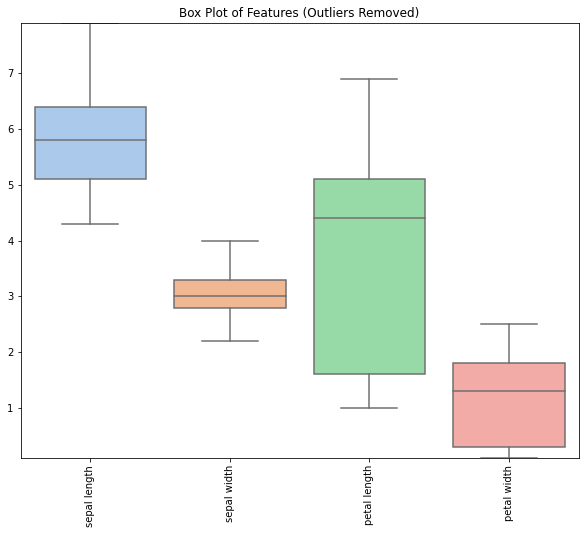

###########################################################

data spliting into train and test dataset
create dummy variables for categorical columns
###################################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  146 non-null    float64
 1   sepal width   146 non-null    float64
 2   petal length  146 non-null    float64
 3   petal width   146 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB
None
###################################################################

###################################################################

targeted values ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
covert targeted column class in the form of 0 and 1 etc if multiclass convert it 0,1,2.......etc
###################################################################

#

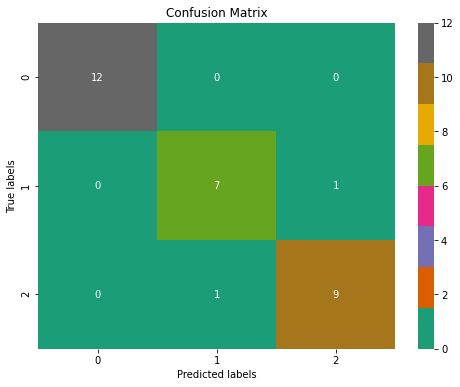

###########################################################

Roc Curve Plot
ROC curve plotting is not supported for multi-class classification.
###########################################################

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [57]:
file_path = None  
id_number = 53
print(Master(file_path=file_path, id=id_number))